In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve)


In [4]:
df = pd.read_csv("heart_cleaned.csv")
df.head()


,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
0,1.164483,1,0.055285,1.357911,0.949345,-0.379948,0,0,0,1,-0.901076,0
1,0.415137,1,0.768636,-0.556714,-1.477957,1.683119,1,1,0,1,0.690536,1
2,-0.633946,1,0.679467,-1.244015,1.353895,0.909469,0,0,0,2,1.193151,0
3,1.464221,0,1.125311,-1.096736,-0.803707,-0.614388,0,0,0,2,-1.571229,0
4,-1.158488,1,-1.371417,-1.636758,1.691020,0.276482,1,1,0,0,-1.654998,0


In [8]:
print(df.columns.tolist())


['Age', 'Gender', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'ECGType', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent']


In [9]:
X = df.drop('RiskOfUpcomingCardiacEvent', axis=1)
y = df['RiskOfUpcomingCardiacEvent']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Features and labels
    test_size=0.2,       # 20% test, 80% train
    random_state=42      # For reproducibility
    )


In [12]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (120, 11)
Test set shape: (30, 11)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train (fit) the model
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
print("Training Accuracy:", model.score(X_train, y_train))


Training Accuracy: 0.9666666666666667


In [16]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities of class 1 (Risk = Yes)
y_prob = model.predict_proba(X_test)[:, 1]


In [17]:
print("Predicted Labels:", y_pred[:5])
print("Predicted Probabilities:", y_prob[:5])


Predicted Labels: [0 0 0 0 0]
Predicted Probabilities: [0.0029096  0.0015946  0.39848423 0.03916022 0.22497881]


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


Confusion Matrix:
 [[24  1]
 [ 2  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.60      0.67         5

    accuracy                           0.90        30
   macro avg       0.84      0.78      0.80        30
weighted avg       0.89      0.90      0.90        30

ROC-AUC Score: 0.976


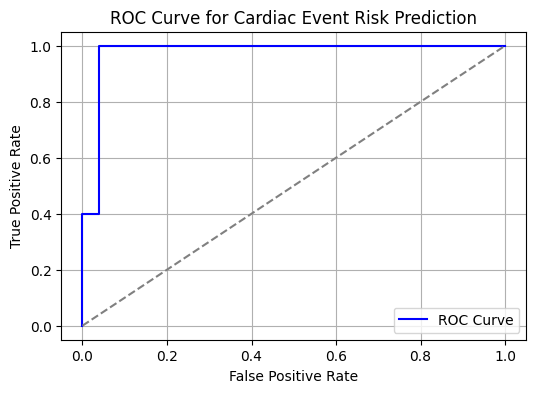

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Cardiac Event Risk Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
custom_threshold = 0.4
y_custom = (y_prob >= custom_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

# Evaluate with new threshold
print("Confusion Matrix at threshold 0.4:")
print(confusion_matrix(y_test, y_custom))

print("\nClassification Report at threshold 0.4:")
print(classification_report(y_test, y_custom))


Confusion Matrix at threshold 0.4:
[[24  1]
 [ 1  4]]

Classification Report at threshold 0.4:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.80      0.80      0.80         5

    accuracy                           0.93        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.93      0.93      0.93        30



In [21]:
for thresh in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(f"\n--- Threshold: {thresh} ---")
    y_thresh = (y_prob >= thresh).astype(int)
    print(confusion_matrix(y_test, y_thresh))
    print(classification_report(y_test, y_thresh))



--- Threshold: 0.3 ---
[[22  3]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.62      1.00      0.77         5

    accuracy                           0.90        30
   macro avg       0.81      0.94      0.85        30
weighted avg       0.94      0.90      0.91        30


--- Threshold: 0.4 ---
[[24  1]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.80      0.80      0.80         5

    accuracy                           0.93        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.93      0.93      0.93        30


--- Threshold: 0.5 ---
[[24  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.60      0.67         5

    accuracy                           0.90        30